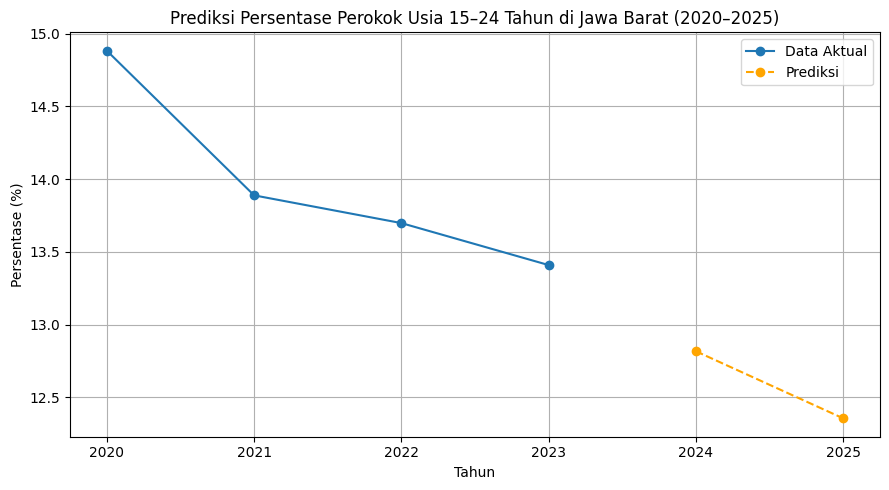

   Tahun  Prediksi Persentase
0   2024            12.817143
1   2025            12.356000


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# === 1. Baca file CSV untuk masing-masing tahun ===
df_2020 = pd.read_csv("data_csv/2020.csv")
df_2021 = pd.read_csv("data_csv/2021.csv")
df_2022 = pd.read_csv("data_csv/2022.csv")
df_2023 = pd.read_csv("data_csv/2023.csv")

# === 2. Hitung rata-rata persentase perokok usia 15–24 tahun per tahun ===
mean_2020 = df_2020.iloc[:, 1].astype(float).mean()
mean_2021 = df_2021.iloc[:, 1].astype(float).mean()
mean_2022 = df_2022.iloc[:, 1].astype(float).mean()
mean_2023 = df_2023.iloc[:, 1].astype(float).mean()

# === 3. Buat dataframe tren historis ===
years = [2020, 2021, 2022, 2023]
averages = [mean_2020, mean_2021, mean_2022, mean_2023]

trend_df = pd.DataFrame({
    'Tahun': years,
    'Rata-rata Persentase': averages
})

# === 4. Buat model regresi linier untuk prediksi ===
X = trend_df['Tahun'].values.reshape(-1, 1)
y = trend_df['Rata-rata Persentase'].values

model = LinearRegression()
model.fit(X, y)

# === 5. Prediksi untuk tahun 2024 dan 2025 ===
future_years = np.array([2024, 2025]).reshape(-1, 1)
future_preds = model.predict(future_years)

# Gabungkan hasil prediksi ke dataframe
predicted_df = pd.DataFrame({
    'Tahun': [2024, 2025],
    'Prediksi Persentase': future_preds
})

# === 6. Plot tren dan prediksi ===
plt.figure(figsize=(9, 5))
plt.plot(years, averages, marker='o', label='Data Aktual')
plt.plot([2024, 2025], future_preds, marker='o', linestyle='--', color='orange', label='Prediksi')
plt.title('Prediksi Persentase Perokok Usia 15–24 Tahun di Jawa Barat (2020–2025)')
plt.xlabel('Tahun')
plt.ylabel('Persentase (%)')
plt.grid(True)
plt.legend()
plt.xticks(years + [2024, 2025])
plt.tight_layout()
plt.show()

# === 7. Tampilkan prediksi numerik ===
print(predicted_df)


Dari Grafik ini menunjukkan tren rata rata persentase perokok usia 15-24 tahun di jawa barat selama 4 tahun terakhir
- 2020: sekitar 14.88%
- 2021: sekitar 13.89%
- 2022: sekitar 13.70%
- 2023: sekitar 13.41%

Tren menunjukkan penurunan bertahap dari tahun 2020 hingga 2023

Prediksi untuk tahun 2024:
Terdapat dua kemungkinan yang dapat terjadi yaitu, terjadi perubahan signifikan (penurunan), dan tidak ada perubahan signifikan untuk 2024

prediksi untuk tahun 2025:
Terdapat dua kemungkinan juga yang sama seperti tahun 2024 yaitu terjadi perubahan signifikan (penurunan), atau tidak ada perubahan yang signifikan

# Interpretasi (2024 - 2025) #

Dari model yang kita gunakan, yaitu model linear regression.
- Model memprediksi bahwa persentase perokok remaja akan menurun secara bertahap hingga tahun 2025 dan seterusnya
- Penurunan ini bersifat moderat namun konsisten, berdasarkan tren dari 2020 hingga 2023

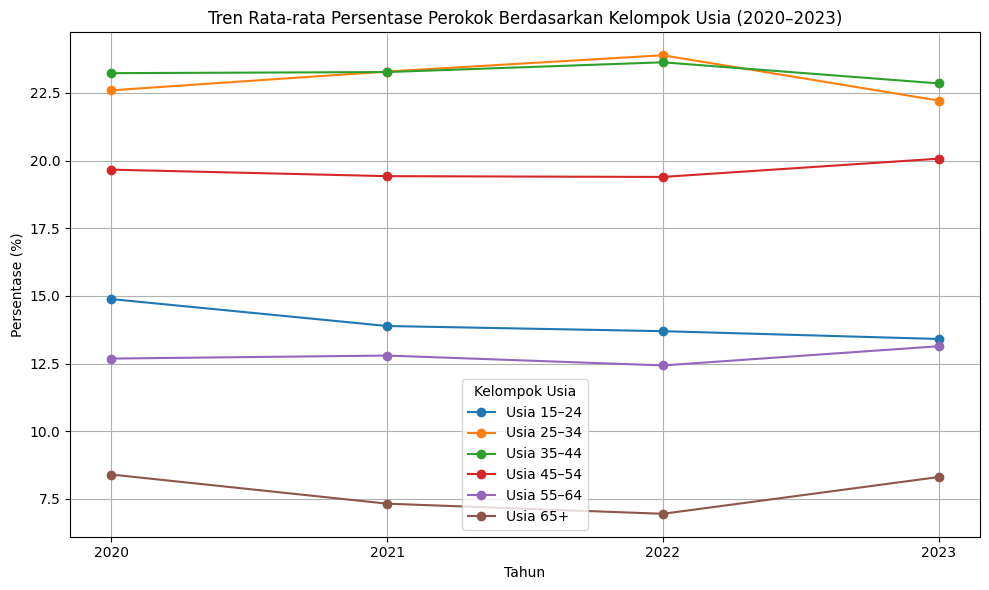

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca file CSV
df_2020 = pd.read_csv("data_csv/2020.csv")
df_2021 = pd.read_csv("data_csv/2021.csv")
df_2022 = pd.read_csv("data_csv/2022.csv")
df_2023 = pd.read_csv("data_csv/2023.csv")

# Hitung rata-rata setiap kelompok usia dari kolom ke-2 dan seterusnya (kolom ke-1 adalah wilayah)
average_by_year = {
    "2020": df_2020.iloc[:, 1:].astype(float).mean(),
    "2021": df_2021.iloc[:, 1:].astype(float).mean(),
    "2022": df_2022.iloc[:, 1:].astype(float).mean(),
    "2023": df_2023.iloc[:, 1:].astype(float).mean(),
}

# Gabungkan ke dalam DataFrame
age_groups_df = pd.DataFrame(average_by_year)
age_groups_df.index.name = "Kelompok Usia"
age_groups_df.reset_index(inplace=True)

# Buat grafik tren
plt.figure(figsize=(10, 6))

# Buat garis untuk setiap kelompok usia
for i, row in age_groups_df.iterrows():
    usia_label = f'Usia {15 + i*10}–{24 + i*10}' if i < 5 else 'Usia 65+'
    plt.plot(["2020", "2021", "2022", "2023"], row[1:], marker='o', label=usia_label)

# Tambahkan judul dan label
plt.title("Tren Rata-rata Persentase Perokok Berdasarkan Kelompok Usia (2020–2023)")
plt.xlabel("Tahun")
plt.ylabel("Persentase (%)")
plt.legend(title="Kelompok Usia")
plt.grid(True)
plt.tight_layout()
plt.show()


📊 Prediksi Persentase Perokok per Kelompok Usia (2024–2025):
                2024   2025
Kelompok Usia              
15–24          12.82  12.36
25–34          22.86  22.81
35–44          23.05  22.97
45–54          19.93  20.05
55–64          13.01  13.11
65+             7.59   7.52


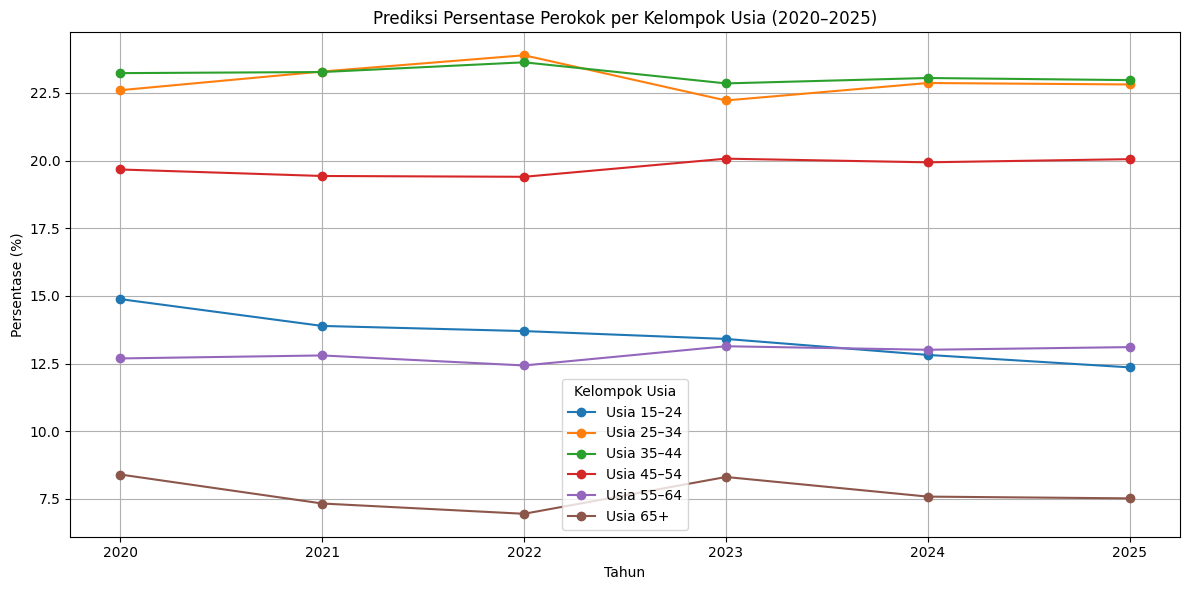

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Data historis (2020–2023) persentase perokok per kelompok usia
data = {
    "Kelompok Usia": ["15–24", "25–34", "35–44", "45–54", "55–64", "65+"],
    "2020": [14.88, 22.60, 23.23, 19.67, 12.69, 8.40],
    "2021": [13.89, 23.29, 23.27, 19.43, 12.80, 7.33],
    "2022": [13.70, 23.89, 23.63, 19.40, 12.43, 6.95],
    "2023": [13.41, 22.22, 22.85, 20.07, 13.14, 8.31],
}

# Buat DataFrame
df = pd.DataFrame(data)
df.set_index("Kelompok Usia", inplace=True)

# Tahun untuk pelatihan & prediksi
tahun_hist = np.array([2020, 2021, 2022, 2023]).reshape(-1, 1)
tahun_pred = np.array([2024, 2025]).reshape(-1, 1)
tahun_lengkap = [2020, 2021, 2022, 2023, 2024, 2025]

# Prediksi tiap kelompok usia
prediksi = pd.DataFrame(index=df.index, columns=[2024, 2025])
for usia in df.index:
    y = df.loc[usia].values.reshape(-1, 1)
    model = LinearRegression().fit(tahun_hist, y)
    y_pred = model.predict(tahun_pred).flatten()
    prediksi.loc[usia] = y_pred

# Gabungkan historis dan prediksi
df_all = pd.concat([df, prediksi.astype(float)], axis=1)
df_all.columns = df_all.columns.astype(str)
tahun_lengkap = ["2020", "2021", "2022", "2023", "2024", "2025"]
df_all = df_all[tahun_lengkap]


# Tampilkan prediksi
print("📊 Prediksi Persentase Perokok per Kelompok Usia (2024–2025):")
print(df_all[["2024", "2025"]].round(2))

# Plot visualisasi
plt.figure(figsize=(12, 6))
for usia in df_all.index:
    plt.plot(tahun_lengkap, df_all.loc[usia], marker='o', label=f"Usia {usia}")

plt.title("Prediksi Persentase Perokok per Kelompok Usia (2020–2025)")
plt.xlabel("Tahun")
plt.ylabel("Persentase (%)")
plt.legend(title="Kelompok Usia")
plt.grid(True)
plt.tight_layout()
plt.show()


---

### **Prediksi Persentase Perokok per Kelompok Usia di Jawa Barat (2024–2025)**

Penelitian ini bertujuan untuk menganalisis tren dan memprediksi persentase perokok di Provinsi Jawa Barat berdasarkan kelompok usia untuk tahun 2024 dan 2025. Data yang digunakan berasal dari persentase perokok aktif usia 15 tahun ke atas pada rentang tahun 2020 hingga 2023, yang kemudian dianalisis menggunakan metode regresi linear.

#### **Metode**

Metode yang digunakan adalah **Regresi Linear Sederhana** dari pustaka `scikit-learn` (`LinearRegression`). Untuk setiap kelompok usia, model dibangun berdasarkan data historis (tahun 2020–2023), lalu digunakan untuk memprediksi nilai pada tahun 2024 dan 2025. Visualisasi dilakukan dengan bantuan `matplotlib` agar tren tiap kelompok usia dapat terlihat dengan jelas.

#### **Kelompok Usia yang Dianalisis:**

* 15–24 tahun
* 25–34 tahun
* 35–44 tahun
* 45–54 tahun
* 55–64 tahun
* 65 tahun ke atas

#### **Hasil Prediksi**

  **Berdasarkan hasil analisis dan prediksi:**
| Kelompok Usia | 2020  | 2021  | 2022  | 2023  | **2024 (prediksi)**  | **2025 (prediksi)**  |
| ------------- | ----- | ----- | ----- | ----- | -------------------  | -------------------  |
| 15–24         | 14.88 | 13.89 | 13.70 | 13.41 | \~12.82              | \~12.36              |
| 25–34         | 22.60 | 23.29 | 23.89 | 22.22 | \~22.86              | \~22.81              |
| 35–44         | 23.23 | 23.27 | 23.63 | 22.85 | \~23.05              | \~22.97              |
| 45–54         | 19.67 | 19.43 | 19.40 | 20.07 | \~19.93              | \~20.05              |
| 55–64         | 12.69 | 12.80 | 12.43 | 13.14 | \~13.01              | \~13.11              |
| 65+           | 8.40  | 7.33  | 6.95  | 8.31  | \~7.59               | \~7.52               |



* Kelompok usia **15–24 tahun** menunjukkan tren penurunan secara konsisten, mengindikasikan keberhasilan kampanye atau regulasi pengendalian tembakau di kalangan remaja.
* Kelompok usia **25–44 tahun** cenderung stabil namun masih mencatat persentase tertinggi dibanding kelompok usia lainnya.
* Kelompok usia **45 tahun ke atas** memiliki tren yang relatif fluktuatif namun umumnya lebih rendah dari kelompok usia produktif.

Visualisasi tren ini menunjukkan perubahan pola perilaku merokok yang berbeda-beda di tiap kelompok umur, dan dapat digunakan oleh pemerintah atau pihak terkait untuk menyusun kebijakan yang lebih tepat sasaran di masa depan.

#### **Kesimpulan**

Prediksi ini memberikan gambaran awal mengenai tren perokok aktif di Jawa Barat dalam dua tahun mendatang. Walaupun model ini menggunakan pendekatan yang sederhana (regresi linear), hasilnya cukup membantu dalam memahami arah pergerakan data dan mendukung pengambilan keputusan berbasis data. Untuk prediksi yang lebih akurat, disarankan mempertimbangkan faktor eksternal seperti kebijakan pemerintah, harga rokok, dan kampanye anti-merokok sebagai variabel tambahan di masa mendatang.

---


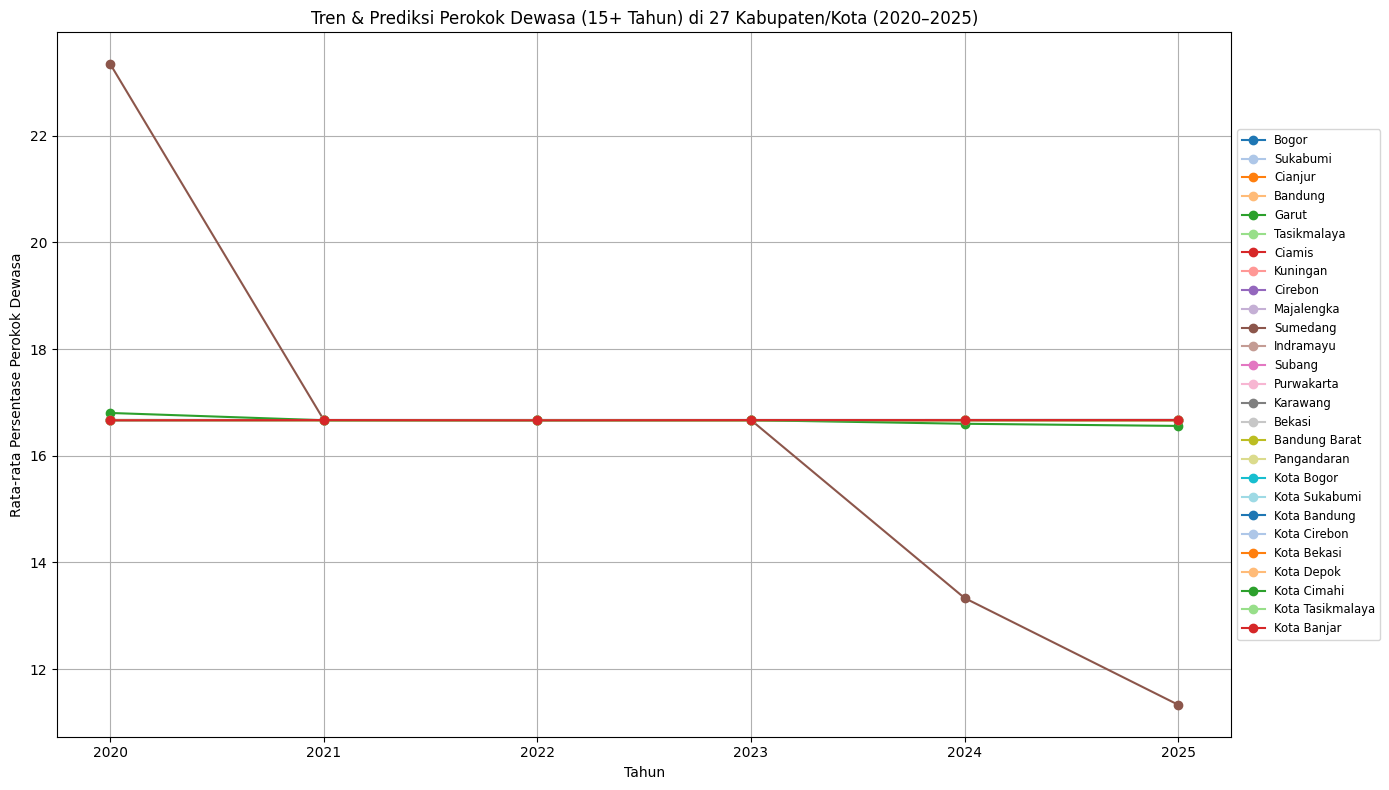

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# === Data dari CSV telah digabung dan dibersihkan dalam df_bersih_all ===
# DataFrame harus berisi kolom: "Kabupaten/Kota", "Tahun", "total_avg"

# Baca file CSV (ganti path jika file ada di lokasi berbeda)
df_2020b = pd.read_csv("data_csv/dataB/2020b.csv")
df_2021b = pd.read_csv("data_csv/dataB/2021b.csv")
df_2022b = pd.read_csv("data_csv/dataB/2022B.csv")
df_2023b = pd.read_csv("data_csv/dataB/2023b.csv")

# Rename kolom agar seragam
kolom_umur_b = {
    "Perokok 15-24": "15-24",
    "Perokok 25-34": "25-34",
    "Perokok 35-44": "35-44",
    "Perokok 45-54": "45-54",
    "Perokok 55-64": "55-64",
    "Perokok 65+": "65+"
}

# Fungsi standar untuk bersihkan dan hitung rata-rata
def standar_data_b(df):
    df = df.rename(columns=kolom_umur_b)
    for col in kolom_umur_b.values():
        df[col] = pd.to_numeric(df[col], errors='coerce')
    df["total_avg"] = df[list(kolom_umur_b.values())].mean(axis=1)
    df = df.rename(columns={"Wilayah": "Kabupaten/Kota", "tahun": "Tahun"})
    return df[["Kabupaten/Kota", "Tahun", "total_avg"]]

# Bersihkan semua data
df_2020b_std = standar_data_b(df_2020b)
df_2021b_std = standar_data_b(df_2021b)
df_2022b_std = standar_data_b(df_2022b)
df_2023b_std = standar_data_b(df_2023b)

# Gabungkan jadi satu
df_bersih_all = pd.concat([df_2020b_std, df_2021b_std, df_2022b_std, df_2023b_std], ignore_index=True)



# Buat daftar prediksi
wilayah_list = df_bersih_all["Kabupaten/Kota"].unique()
prediksi_data = []

# Buat prediksi 2024 & 2025 untuk tiap wilayah
for wilayah in wilayah_list:
    data_wilayah = df_bersih_all[df_bersih_all["Kabupaten/Kota"] == wilayah]
    X = data_wilayah["Tahun"].values.reshape(-1, 1)
    y = data_wilayah["total_avg"].values

    # Linear Regression
    model = LinearRegression()
    model.fit(X, y)

    # Prediksi untuk tahun 2024 dan 2025
    y_pred = model.predict([[2024], [2025]])
    for tahun, pred in zip([2024, 2025], y_pred):
        prediksi_data.append({
            "Kabupaten/Kota": wilayah,
            "Tahun": tahun,
            "total_avg": pred
        })

# Gabungkan hasil prediksi dengan data asli
df_prediksi = pd.DataFrame(prediksi_data)
df_semua = pd.concat([df_bersih_all, df_prediksi], ignore_index=True)

# === Visualisasi ===
plt.figure(figsize=(14, 8))
colors = plt.cm.tab20.colors  # Warna untuk garis

for i, wilayah in enumerate(wilayah_list):
    subset = df_semua[df_semua["Kabupaten/Kota"] == wilayah]
    plt.plot(
        subset["Tahun"], subset["total_avg"],
        marker='o', label=wilayah,
        color=colors[i % len(colors)]
    )

plt.title("Tren & Prediksi Perokok Dewasa (15+ Tahun) di 27 Kabupaten/Kota (2020–2025)")
plt.xlabel("Tahun")
plt.ylabel("Rata-rata Persentase Perokok Dewasa")
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')
plt.tight_layout()
plt.show()


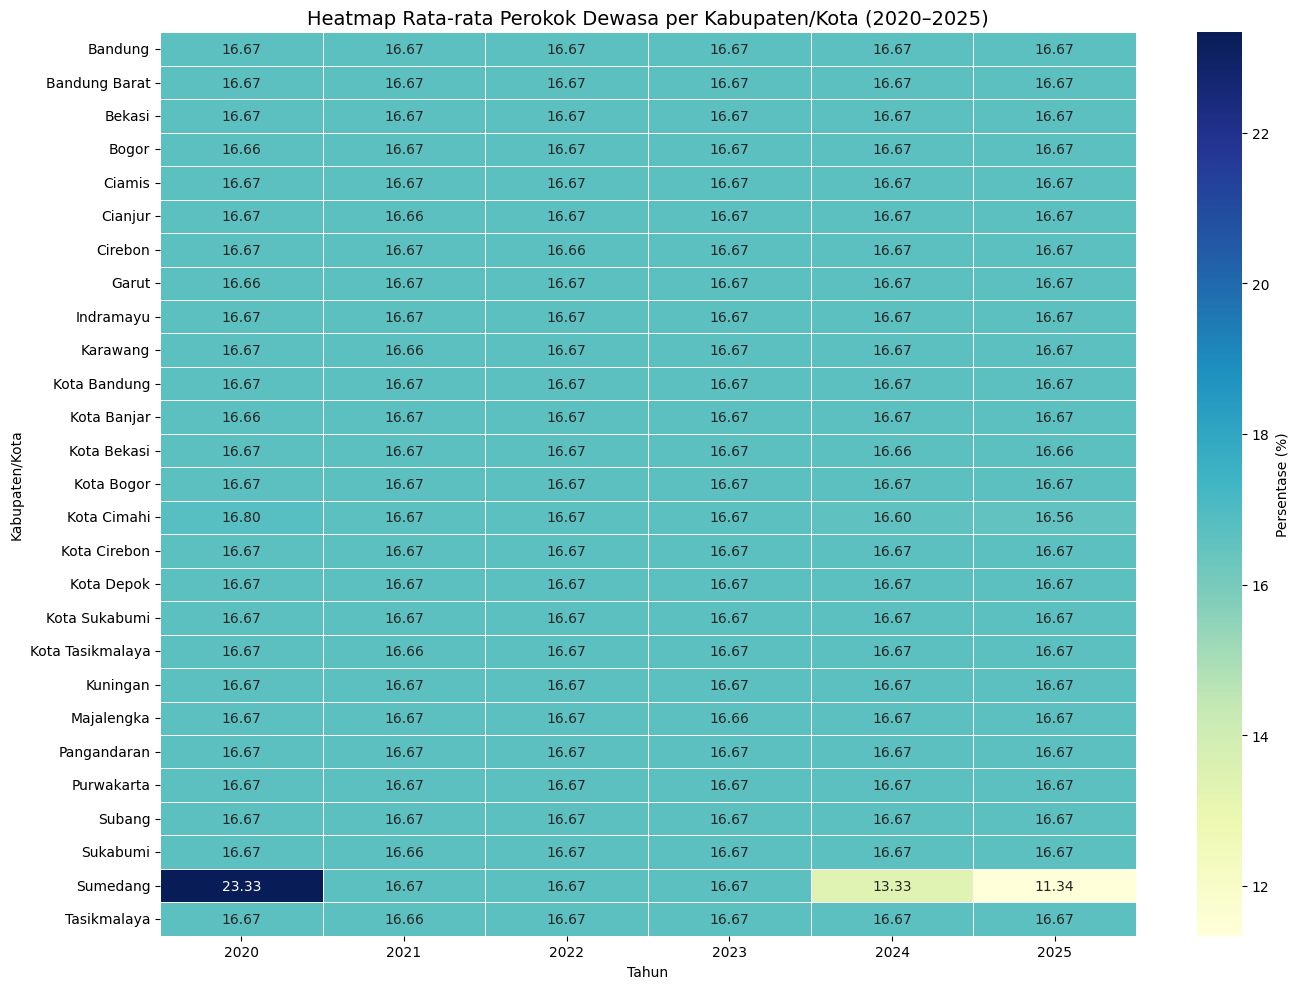

In [33]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Load CSV ---
df_2020b = pd.read_csv("data_csv/dataB/2020b.csv")
df_2021b = pd.read_csv("data_csv/dataB/2021b.csv")
df_2022b = pd.read_csv("data_csv/dataB/2022B.csv")
df_2023b = pd.read_csv("data_csv/dataB/2023b.csv")

# --- 2. Standarkan kolom dan hitung rata-rata ---
kolom_umur_b = {
    "Perokok 15-24": "15-24",
    "Perokok 25-34": "25-34",
    "Perokok 35-44": "35-44",
    "Perokok 45-54": "45-54",
    "Perokok 55-64": "55-64",
    "Perokok 65+": "65+"
}

def standar_data_b(df):
    df = df.rename(columns=kolom_umur_b)
    for col in kolom_umur_b.values():
        df[col] = pd.to_numeric(df[col], errors='coerce')
    df["total_avg"] = df[list(kolom_umur_b.values())].mean(axis=1)
    df = df.rename(columns={"Wilayah": "Kabupaten/Kota", "tahun": "Tahun"})
    return df[["Kabupaten/Kota", "Tahun", "total_avg"]]

df_2020b_std = standar_data_b(df_2020b)
df_2021b_std = standar_data_b(df_2021b)
df_2022b_std = standar_data_b(df_2022b)
df_2023b_std = standar_data_b(df_2023b)

# --- 3. Gabungkan semua tahun ---
df_bersih_all = pd.concat([df_2020b_std, df_2021b_std, df_2022b_std, df_2023b_std], ignore_index=True)

# --- 4. Prediksi 2024 & 2025 menggunakan Linear Regression per wilayah ---
wilayah_list = df_bersih_all["Kabupaten/Kota"].unique()
prediksi_data = []

for wilayah in wilayah_list:
    data_wilayah = df_bersih_all[df_bersih_all["Kabupaten/Kota"] == wilayah]
    X = data_wilayah["Tahun"].values.reshape(-1, 1)
    y = data_wilayah["total_avg"].values
    model = LinearRegression().fit(X, y)
    y_pred = model.predict([[2024], [2025]])
    for tahun, pred in zip([2024, 2025], y_pred):
        prediksi_data.append({
            "Kabupaten/Kota": wilayah,
            "Tahun": tahun,
            "total_avg": pred
        })

df_prediksi = pd.DataFrame(prediksi_data)
df_semua = pd.concat([df_bersih_all, df_prediksi], ignore_index=True)

# --- 5. Buat Heatmap ---
heatmap_data = df_semua.pivot(index="Kabupaten/Kota", columns="Tahun", values="total_avg")

plt.figure(figsize=(14, 10))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".2f",
    cmap="YlGnBu",
    linewidths=.5,
    cbar_kws={'label': 'Persentase (%)'}
)

plt.title("Heatmap Rata-rata Perokok Dewasa per Kabupaten/Kota (2020–2025)", fontsize=14)
plt.xlabel("Tahun")
plt.ylabel("Kabupaten/Kota")
plt.tight_layout()
plt.show()

## **Hipotesis Berdasarkan wilayah** ##
Tingkat perokok di wilayah jawa barat menunjukkan tren yg relatif stabil hingga 2023, namun diprediksi mengalami peningkatan ringan hingga 2025 di sebagian besar wilayah

